# Projet 7 - Implementation of a scoring model
# Notebook - Model comparison

# Context




# Data sources

The webpage containing all data and descriptions: <a href="https://www.kaggle.com/c/home-credit-default-risk/data" target="_blank">here</a>.

# Glossary

__- TP:__ True positives correspond to customers which are classified as they would default the repayment of their loan and they would as expected.<br>
__- FP:__ False positives correspond to customers which were guessed trustless to repay their loans whereas they would have to (Secondary case to avoid and minimize if possible).<br>
__- FN:__ False negatives correspond to customers which were guessed trustful to repay their loans whereas they will not (Worst case to absolutly minimize).<br>
__- TN:__ True negatives correspond to customers which are classified as they would not default the repayment of their loan and they don't as expected.<br>
__- dt_sp:__ Data sampling.<br>
__- wt:__ Weight.<br>
__- opt:__ Optimal.<br>
__- synth_sp:__ Synthetic sampling.<br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7---Implementation-of-a-scoring-model" data-toc-modified-id="Projet-7---Implementation-of-a-scoring-model-1">Projet 7 - Implementation of a scoring model</a></span></li><li><span><a href="#Notebook---Model-comparison" data-toc-modified-id="Notebook---Model-comparison-2">Notebook - Model comparison</a></span></li><li><span><a href="#Context" data-toc-modified-id="Context-3">Context</a></span></li><li><span><a href="#Data-sources" data-toc-modified-id="Data-sources-4">Data sources</a></span></li><li><span><a href="#Glossary" data-toc-modified-id="Glossary-5">Glossary</a></span></li><li><span><a href="#I)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Importation-of-the-dataset-into-a-pandas-dataframe-6">I) Importation of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-6.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Importation-of-the-preprocessed-datasets" data-toc-modified-id="2)-Importation-of-the-preprocessed-datasets-6.2">2) Importation of the preprocessed datasets</a></span></li><li><span><a href="#3)-Separation-of-the-explicatives-and-the-explicated" data-toc-modified-id="3)-Separation-of-the-explicatives-and-the-explicated-6.3">3) Separation of the explicatives and the explicated</a></span></li></ul></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-7">Interpretations</a></span><ul class="toc-item"><li><span><a href="#Global" data-toc-modified-id="Global-7.1">Global</a></span><ul class="toc-item"><li><span><a href="#LightGBM-importance-parameter" data-toc-modified-id="LightGBM-importance-parameter-7.1.1">LightGBM importance parameter</a></span></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-7.1.2">SHAP</a></span><ul class="toc-item"><li><span><a href="#Library-importation" data-toc-modified-id="Library-importation-7.1.2.1">Library importation</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-7.1.2.2">Functions</a></span></li><li><span><a href="#Shap-explanation" data-toc-modified-id="Shap-explanation-7.1.2.3">Shap explanation</a></span></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-7.1.2.4">Interpretations</a></span></li></ul></li></ul></li><li><span><a href="#Local" data-toc-modified-id="Local-7.2">Local</a></span><ul class="toc-item"><li><span><a href="#Shap" data-toc-modified-id="Shap-7.2.1">Shap</a></span><ul class="toc-item"><li><span><a href="#Shap-explanation" data-toc-modified-id="Shap-explanation-7.2.1.1">Shap explanation</a></span></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-7.2.1.2">Interpretations</a></span></li></ul></li><li><span><a href="#Dashboard:-streamlit" data-toc-modified-id="Dashboard:-streamlit-7.2.2">Dashboard: streamlit</a></span></li><li><span><a href="#LIME" data-toc-modified-id="LIME-7.2.3">LIME</a></span></li></ul></li></ul></li><li><span><a href="#API-Flask" data-toc-modified-id="API-Flask-8">API Flask</a></span></li></ul></div>

# I) Importation of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [1]:
from shared_functions import *

In [2]:
IMPORTS_DIR_PATH = r'Exports\Preprocessed_data'
EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried'
SELECTED_MODEL_DIR_PATH = r'Exports\Models\Selected' 

PKL_MODELS_FILE = 'models_info.pkl'
PKL_MODEL_FILE = 'selected_model.pkl'

## 2) Importation of the preprocessed datasets

In [3]:
df_train = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
#df_valid = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_valid.csv'))
df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))
#df_new_customers = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_new_customers.csv'))

In [4]:
# Set the customer IDs as indeces.
df_train = df_train.set_index('SK_ID_CURR')
df_test = df_test.set_index('SK_ID_CURR')

In [5]:
#df_test_w_ids = df_test.copy()

In [6]:
#del_features = ['SK_ID_CURR'] #, 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']

#df_train = df_train.drop(del_features, axis=1)
#df_valid = df_valid.drop(del_features, axis=1)
#df_test = df_test.drop(del_features, axis=1)

In [7]:
%%time

df_train = find_int_cols(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 113355.0 to 101466.0
Columns: 169 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float64(112), int64(57)
memory usage: 31.1 MB
CPU times: total: 3.66 s
Wall time: 3.65 s


In [8]:
df_train = reduce_memory(df_train)

Initial df memory usage is 31.13 MB for 169 columns
Final memory usage is: 8.93 MB - decreased by 71.3%


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 113355.0 to 101466.0
Columns: 169 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float16(71), float32(41), int16(19), int8(38)
memory usage: 8.9 MB


## 3) Separation of the explicatives and the explicated

In [10]:
X_TRAIN = df_train.drop('TARGET', axis=1)
y_TRAIN = df_train['TARGET']

#X_VALID = df_valid.drop('TARGET', axis=1)
#y_VALID = df_valid['TARGET']

X_TEST = df_test.drop('TARGET', axis=1)
y_TEST = df_test['TARGET']

In [11]:
#model_pl_label = 'wt_lgbm_clf_fine_opt'

# Load the last values calculated for the hyperparameters.
df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')
#model_pl_opt = df_MODELS.loc[model_pl_label, 'Models']

# Load the serialized model.
model_pl_opt = pickle.load(open(os.path.join(SELECTED_MODEL_DIR_PATH, PKL_MODEL_FILE), "rb"))
model_pl_opt

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
                                learning_rate=0.18, max_depth=20,
                                min_child_weight=6, n_estimators=22,
                                objective='binary', random_state=0,
                                reg_alpha=0.1, reg_lambda=0.001,
                                subsample=0.9)]])

# Interpretations

## Global

### LightGBM importance parameter

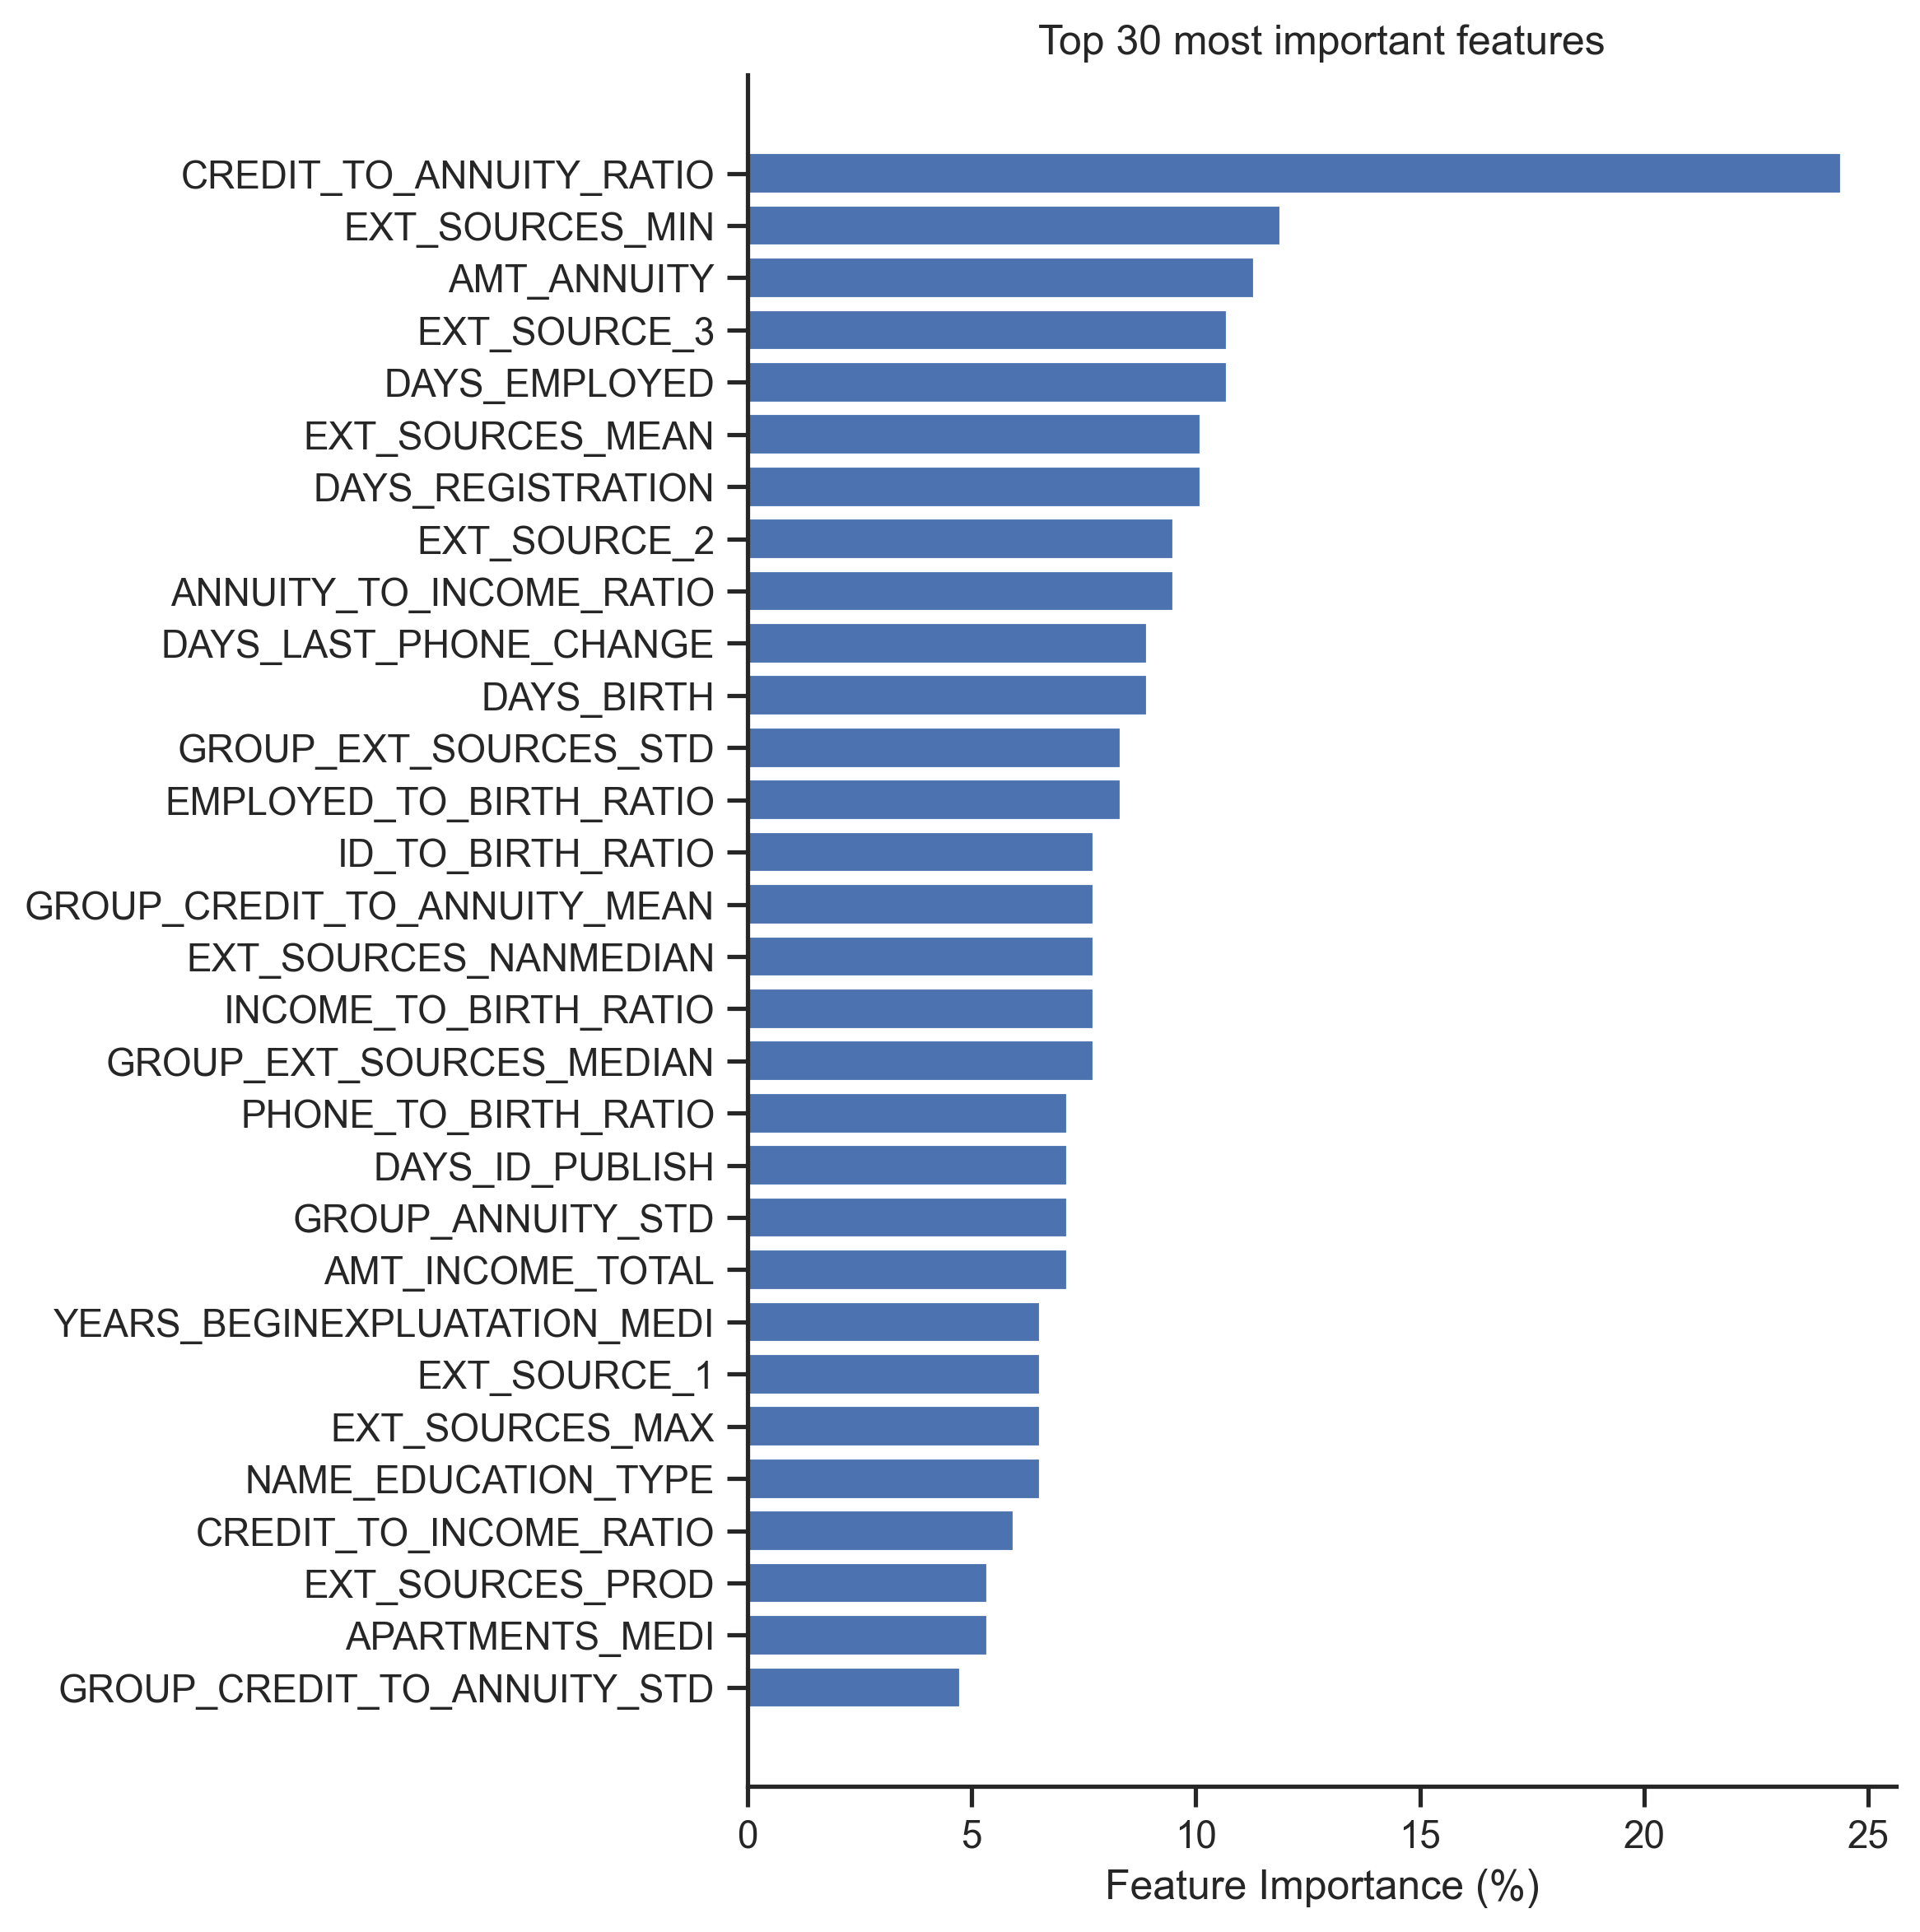

In [12]:
n_top_fts = 30

#model_pl_opt['model'].fit(X_TRAIN, y_TRAIN)

npa_top_fts = model_pl_opt['model'].feature_importances_.argsort()#[-n_top_fts:]

plt.figure(figsize=(6,9), dpi=300)

plt.barh(X_TRAIN.columns[npa_top_fts[-n_top_fts:]], model_pl_opt['model'].\
         feature_importances_[npa_top_fts[-n_top_fts:]] / len(X_TRAIN.columns) * 100)

plt.xlabel("Feature Importance (%)")
plt.title("Top %i most important features" % n_top_fts)

plt.show()

### SHAP

- doc 1: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html
- doc 2: https://shap-lrjball.readthedocs.io/en/latest/generated/shap.dependence_plot.html

*NB: More about Kernel Explainer and its requirements for big datasets that Tree explainer bypasses:* https://colab.research.google.com/drive/1pjPzsw_uZew-Zcz646JTkRDhF2GkPk0N#scrollTo=SCOJFGMj3fq5

#### Library importation

In [13]:
import shap

shap.initjs()

In [14]:
STOP

NameError: name 'STOP' is not defined

#### Functions

#### Shap explanation

- Different explainers: https://snyk.io/advisor/python/shap/functions/shap.explainers.explainer.Explainer
- Background data or not & feature_perturbation = "interventional" or "tree_path_dependent" ? https://github.com/slundberg/shap/issues/1098 <br>
=> Background data: Closer to the model. <br>

*NB: According to the model (classifier or regressor) and the presence or not of background data, some graphics (such as shap.plots.bar()) won't behave the same way and might not be usable (for the classifiers mainly). Ex: shap.plots.bar can replaced by shap.plot_bar but such graphics are less detailed (as it can be noticed in a couple of cells below).*

In [ ]:
# Select the number of the most important features to keep.
top_ft = 10

# Select the client.
client_idx = 0

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the pipeline to use.
model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
model_pl = df_MODELS.loc[model_pl_label]['Models']

# Get the model and the scaler of the pipeline.
scaler = model_pl['scaler']
model = model_pl['model']

# Get the model and the scaler of the pipeline.
#scaler = model_pl_opt['scaler']
#clf = model_pl_opt['model']

# Scale the train and the test set to fit the model pipeline inputs format.
X_train_norm = scaler.transform(X_TRAIN)
X_test_norm = pd.DataFrame(scaler.transform(X_TEST), columns=X_TEST.columns)



# Get a sample of the scaled train set to accelerate the training process.
# 1. Sampling for KernelExplainer():
#X_train_norm_sp = shap.sample(X_train_norm, 100, random_state=None) # use 600 samples of train data as background data
#X_test_norm_sp = shap.sample(X_test_norm, 5, random_state=None)

# 2. Sampling for TreeExplainer():
#X_test_norm_sp = pd.DataFrame(X_test_norm, columns=X_TEST.columns)

t0 = time()

# Create the explainer model (simplified .
# 1. Config for KernelExplainer:
#explainer_shap = shap.KernelExplainer(clf.predict_proba, X_train_norm_sp)

# 2. Config for TreeExplainer():
explainer_shap = shap.TreeExplainer(clf, X_train_norm, model_output='probability')


# Get explanations
#explanations = explainer_shap(pd.DataFrame(X_test_norm_sp, columns=X_TEST.columns))
explanations = explainer_shap(X_test_norm)

#explanations.values = np.array([np.array([explanations.values[i][j][0] for i in range(len(explanations.values))]) for j in range(len(explanations.values[i]))])
#explanations.base_values = np.array([explanations.base_values[i][0] for i in range(len(explanations.base_values))])


# If the negative class is chosen so the SHAP's values gotten for the positive class (1) needs to be adapated.
if cat_class == 0:
    explanations.values = - explanations.values
    explanations.base_values = 1 - explanations.base_values
    
# Get the shapley values.
# 1. Config for KernelExplainer:
#shap_values = explainer_shap.shap_values(X_test_norm_sp, l1_reg='aic')

# 2. Config for TreeExplainer:
# NB: Get shap values only: shap_values = explainer_shap.shap_values(X_test_norm)
#shap_values = explainer_shap.shap_values(X_test_norm_sp) #explainer_shap.shap_values(X_test_norm_sp) #explainer_shap.shap_values(X_test_norm_sp)

delta_t = time() - t0


# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = clf.predict_proba(X_train_norm).mean(axis=0)
yhat_shap_base_value_mean = explanations.base_values.mean(axis=0)

    
# Transform log odd values to odd (easier to understand for clients and staffs).
yhat = clf.predict_proba(X_test_norm)
#explanations_transformed = logodd_to_odd(explanations, yhat, cat_class)

In [ ]:
### TEST TEST TEST ####


# Select the number of the most important features to keep.
top_ft = 10

# Select the client.
client_idx = None

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the pipeline to use.
model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
model_pl = df_MODELS.loc[model_pl_label]['Models']

# Get the model and the scaler of the pipeline.
scaler = model_pl['scaler']
model = model_pl['model']

# Get the model and the scaler of the pipeline.
#scaler = model_pl_opt['scaler']
#model = model_pl_opt['model']

# Scale the train and the test set to fit the model pipeline inputs format.
X_train_norm = scaler.transform(X_TRAIN)
X_test_norm = scaler.transform(X_TEST) 


    # Get a sample of the scaled train set to accelerate the training process.
    # 1. Sampling for KernelExplainer():
    #X_train_norm_sp = shap.sample(X_train_norm, 100, random_state=None) # use 600 samples of train data as background data
    #X_test_norm_sp = shap.sample(X_test_norm, 5, random_state=None)

    # 2. Sampling for TreeExplainer():
if client_idx == None: # Global.
    X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)
else: # Local.
    X_test_norm = pd.DataFrame(X_test_norm[client_idx].reshape(1,-1), columns=X_test.columns)
    

    #t0 = time()

    # Create the explainer model (simplified .
    # 1. Config for KernelExplainer:
    #explainer_shap = shap.KernelExplainer(clf.predict_proba, X_train_norm_sp)

    # 2. Config for TreeExplainer():
explainer_shap = shap.TreeExplainer(model, X_train_norm, model_output='probability')
    

    # Get explanations
    #explanations = explainer_shap(pd.DataFrame(X_test_norm_sp, columns=X_TEST.columns))
explanations = explainer_shap(X_test_norm)
    
    # If the negative class is chosen so the SHAP's values gotten for the positive class (1) needs to be adapated.
if cat_class == 0:
    explanations.values = - explanations.values
    explanations.base_values = 1 - explanations.base_values

    # Get the shapley values.
    # 1. Config for KernelExplainer:
    #shap_values = explainer_shap.shap_values(X_test_norm_sp, l1_reg='aic')

    # 2. Config for TreeExplainer:
    # NB: Get shap values only: shap_values = explainer_shap.shap_values(X_test_norm)
    #shap_values = explainer_shap.shap_values(X_test_norm_sp) #explainer_shap.shap_values(X_test_norm_sp) #explainer_shap.shap_values(X_test_norm_sp)

    #delta_t = time() - t0

    # Transform log odd values to odd (easier to understand for clients and staffs).
    #yhat = clf.predict_proba(X_test_norm)
    #explanations_transformed = logodd_to_odd(explanations, yhat, cat_class)


# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = clf.predict_proba(X_train_norm).mean(axis=0)
yhat_shap_base_value_mean = explanations.base_values.mean(axis=0)

    
# Transform log odd values to odd (easier to understand for clients and staffs).
yhat = clf.predict_proba(X_test_norm)
#explanations_transformed = logodd_to_odd(explanations, yhat, cat_class)

In [15]:
# Select the number of the most important features to keep.
top_ft = 10

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the model and the scaler of the pipeline separatly.
# NB: Because the model type 'imblearn.pipeline.Pipeline' is not yet supported by TreeExplainer. 
#model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
#model_pl = df_MODELS.loc[model_pl_label]['Models']
#scaler = model_pl['scaler']
#model = model_pl['model']
scaler = model_pl_opt['scaler']
model = model_pl_opt['model']

# Get the SHAP explanations of the observation.
explanations, delta_t = interpretability_shap(model, scaler,
                                              X_TRAIN, X_TEST,
                                              cat_class=cat_class)



# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = model_pl_opt.predict_proba(X_TRAIN).mean(axis=0)
yhat_shap_base_value_mean = explanations.base_values.mean(axis=0)

In [16]:
# Summarize relevant values.
print("Model used:\n", model)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %s class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", model_pl_opt.predict_proba(X_TEST)[0])
print()
#print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

Model used:
 LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
               learning_rate=0.18, max_depth=20, min_child_weight=6,
               n_estimators=22, objective='binary', random_state=0,
               reg_alpha=0.1, reg_lambda=0.001, subsample=0.9)

Model mean prediction probabilities on train data: [0.62664676 0.37335324]

Model mean proportions of the 0 class predictions (=> Ratio of accepted applications): 0.627
SHAP expected mean proportions of the 0 class predictions: 0.645
SHAP explanation reliability index = 0.981

Model prediction probabilities for the tested data: [0.47371751 0.52628249]




#### Interpretations

__- Mean absolute shapley values__

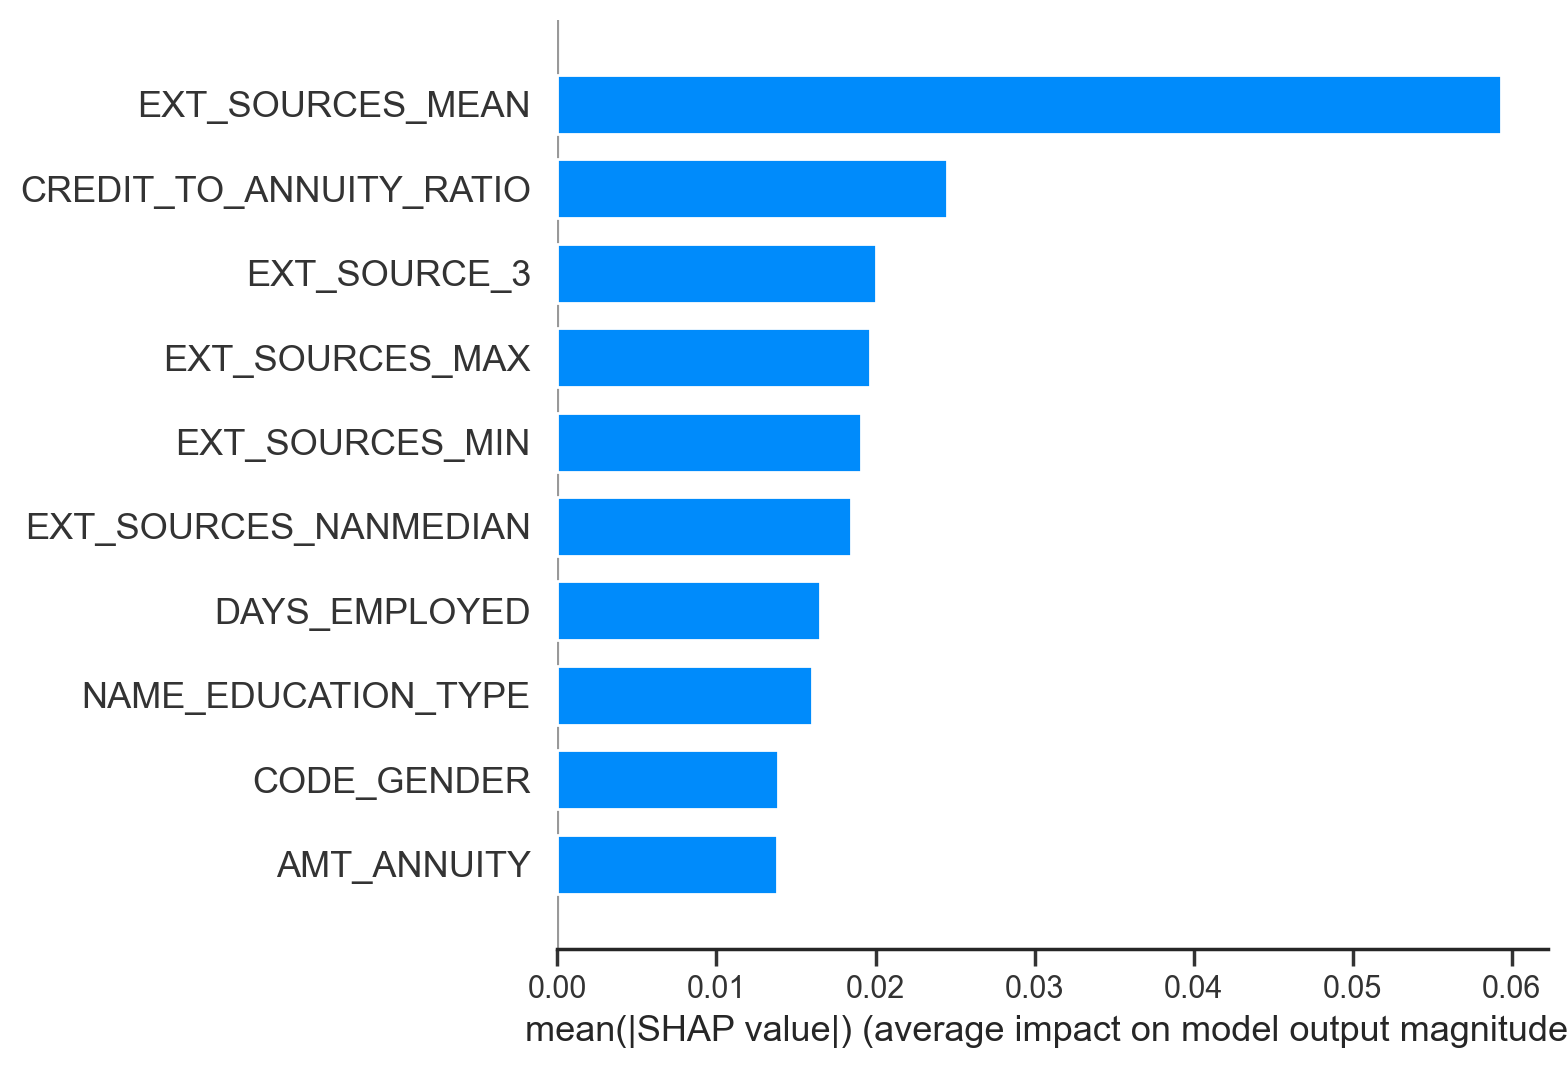

In [17]:
# Method 1:
shap.summary_plot(explanations, max_display=top_ft, plot_type='bar') #feature_names=X_TEST.columns,

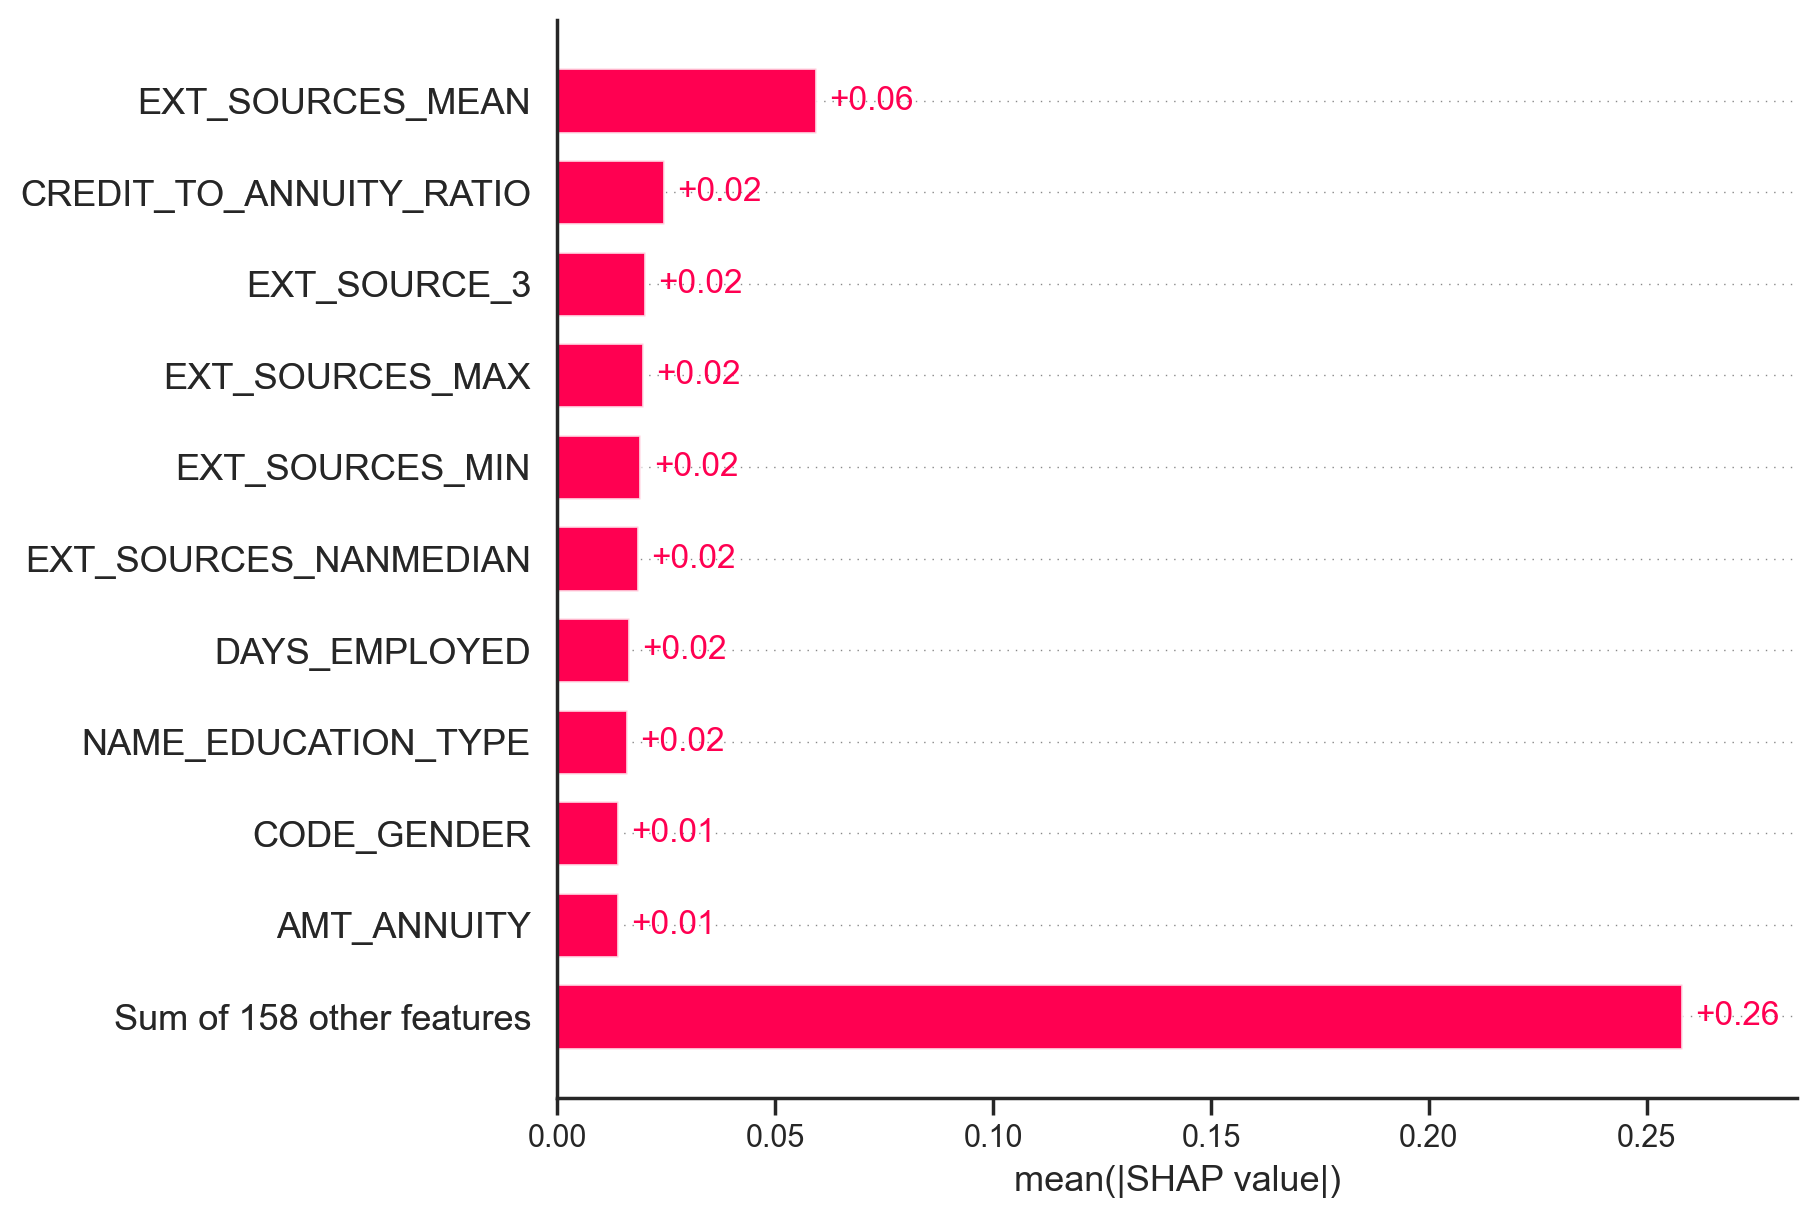

In [18]:
# Method 2 (with the absolute mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations, max_display=top_ft+1)

In [19]:
# Method 3 (with the shapley values as text):
# Source: https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")
        
print_feature_importances_shap_values(explanations, X_TEST.columns)

EXT_SOURCES_MEAN -> 0.0593 (softmax = 0.0063)
CREDIT_TO_ANNUITY_RATIO -> 0.0245 (softmax = 0.0061)
EXT_SOURCE_3 -> 0.0200 (softmax = 0.0061)
EXT_SOURCES_MAX -> 0.0197 (softmax = 0.0061)
EXT_SOURCES_MIN -> 0.0191 (softmax = 0.0060)
EXT_SOURCES_NANMEDIAN -> 0.0185 (softmax = 0.0060)
DAYS_EMPLOYED -> 0.0165 (softmax = 0.0060)
NAME_EDUCATION_TYPE -> 0.0160 (softmax = 0.0060)
CODE_GENDER -> 0.0139 (softmax = 0.0060)
AMT_ANNUITY -> 0.0138 (softmax = 0.0060)
ANNUITY_TO_INCOME_RATIO -> 0.0132 (softmax = 0.0060)
EMPLOYED_TO_BIRTH_RATIO -> 0.0103 (softmax = 0.0060)
INCOME_TO_BIRTH_RATIO -> 0.0102 (softmax = 0.0060)
DAYS_BIRTH -> 0.0089 (softmax = 0.0060)
EXT_SOURCE_2 -> 0.0088 (softmax = 0.0060)
EXT_SOURCES_PROD -> 0.0085 (softmax = 0.0060)
FLAG_DOCUMENT_3 -> 0.0076 (softmax = 0.0060)
NEW_DOC_KURT -> 0.0075 (softmax = 0.0060)
CREDIT_TO_INCOME_RATIO -> 0.0075 (softmax = 0.0060)
GROUP_CREDIT_TO_ANNUITY_MEAN -> 0.0070 (softmax = 0.0060)
DAYS_REGISTRATION -> 0.0070 (softmax = 0.0060)
CAR_TO_BIRTH_RA

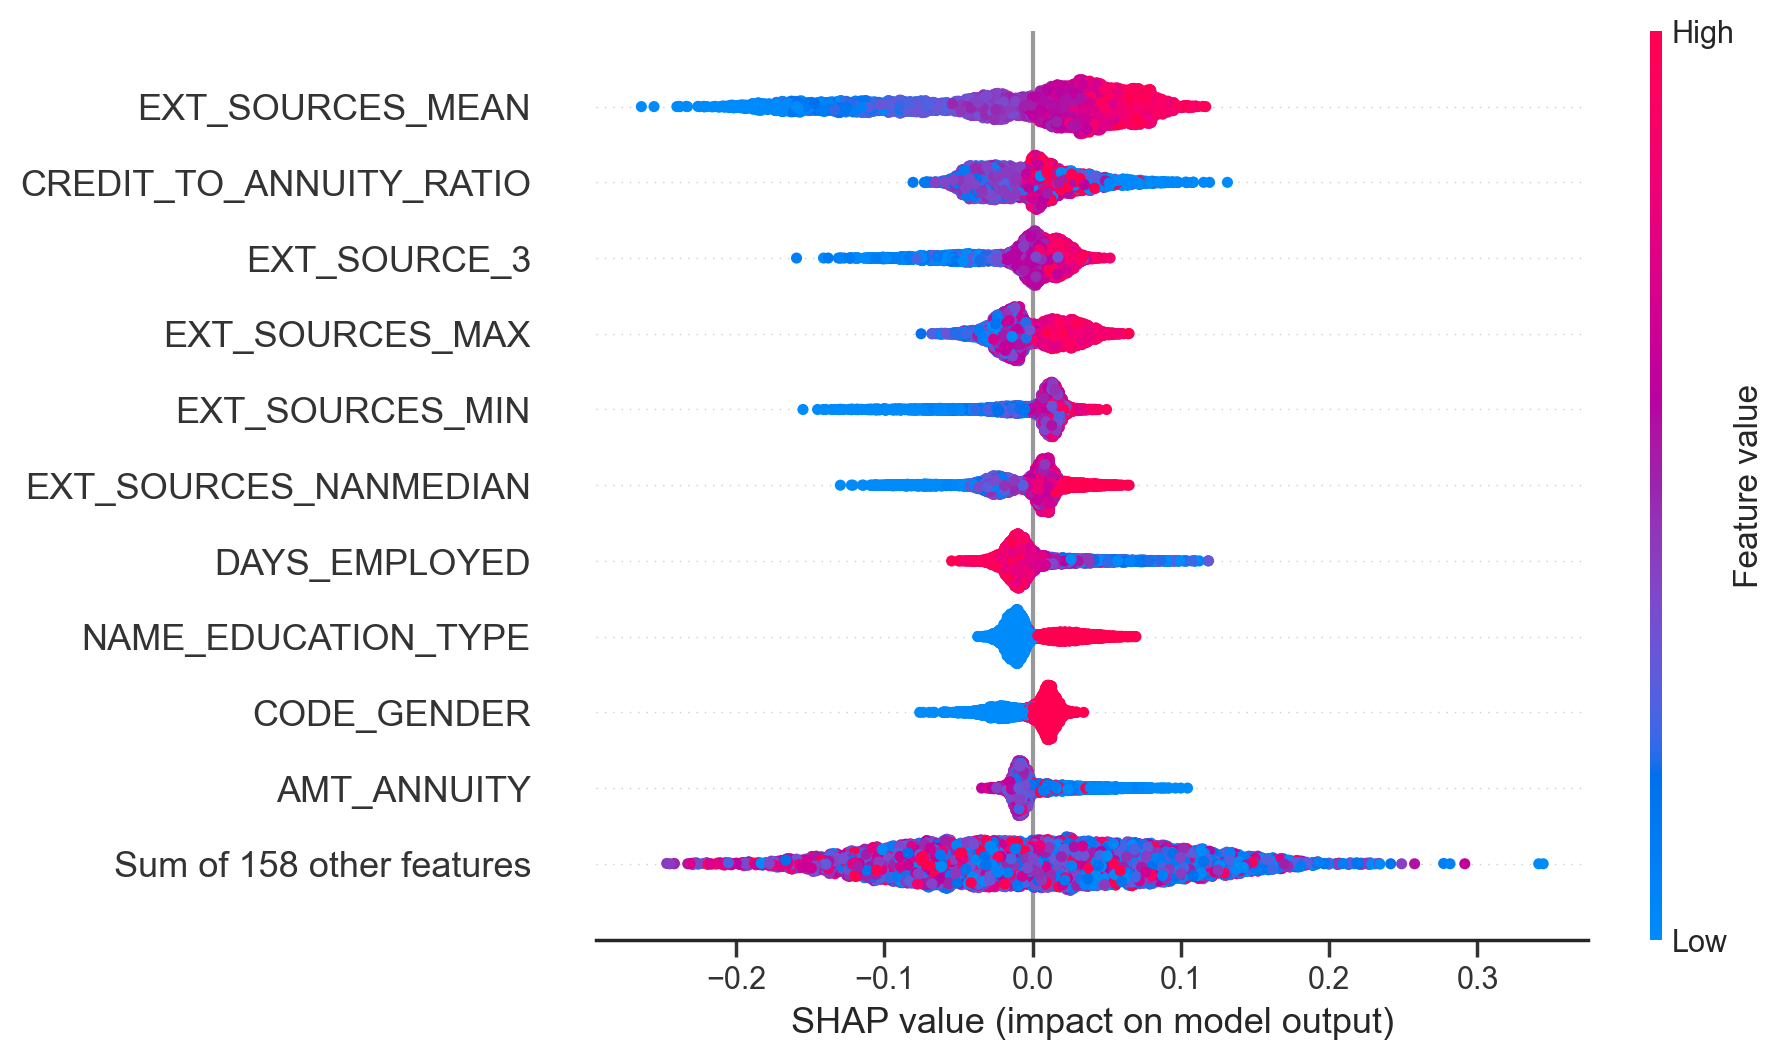

In [20]:
# Method 4 (Beeswarm):
# NB: Equivalent plot: shap.summary_plot(explanations, X_test_norm, feature_names=X_TEST.columns, max_display=top_ft, plot_type='dot')
shap.plots.beeswarm(explanations, max_display=top_ft+1)

__- Features' influences and dependences__

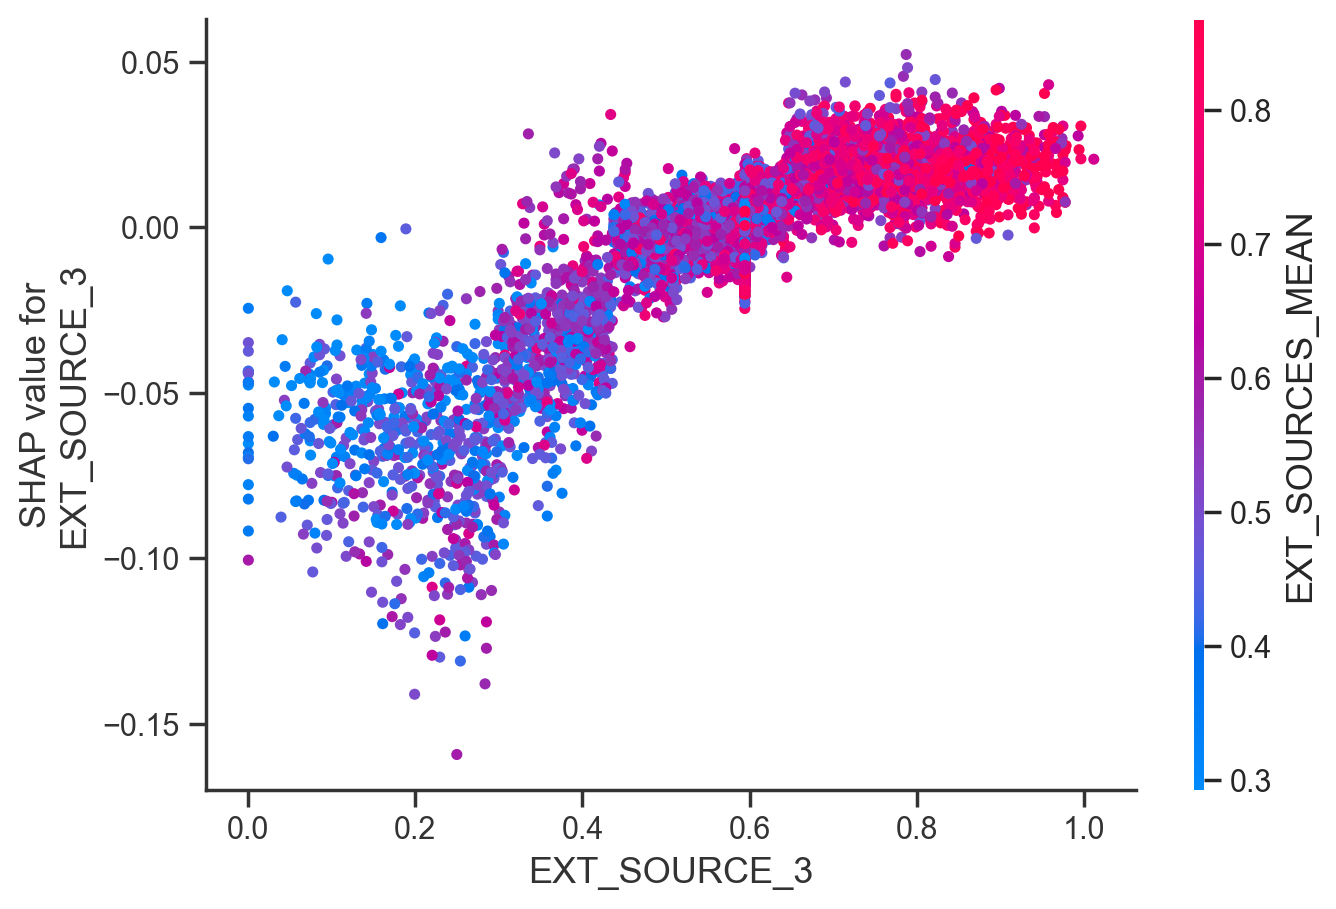

In [21]:
# Detail features influences on predictions.
X_test_norm = pd.DataFrame(scaler.transform(X_TEST), columns=X_TEST.columns)
shap.dependence_plot('EXT_SOURCE_3', explanations.values, X_test_norm, interaction_index='EXT_SOURCES_MEAN') #feature_names=X_TEST.columns

## Local

### Shap

#### Shap explanation

In [45]:
# Select the customer to observe by its ID.
customer_id = 118485 #118464

# Select the number of the most important features to show.
top_ft = 10

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the model and the scaler of the pipeline.
#model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
#model_pl = df_MODELS.loc[model_pl_label]['Models']
#scaler = model_pl['scaler']
#model = model_pl['model']
scaler = model_pl_opt['scaler']
model = model_pl_opt['model']

# Get the corresponding customer index within the df or numpy array.
#customer_df_idx = list(df_test.index).index(customer_id)

# Get the SHAP explanations of the observation.
explanations, delta_t = interpretability_shap(model, scaler,
                                              X_TRAIN, X_TEST.loc[[customer_id]],
                                              customer_idx=customer_df_idx,
                                              cat_class=cat_class)



# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = model_pl_opt.predict_proba(X_TRAIN).mean(axis=0)
yhat_shap_base_value_mean = explanations.base_values.mean(axis=0)

In [56]:
# Summarize relevant values.
print("Model used:\n", model)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %s class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", model_pl_opt.predict_proba(X_TEST.loc[[customer_id]])[0])
print()
print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

Model used:
 LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
               learning_rate=0.18, max_depth=20, min_child_weight=6,
               n_estimators=22, objective='binary', random_state=0,
               reg_alpha=0.1, reg_lambda=0.001, subsample=0.9)

Model mean prediction probabilities on train data: [0.62664676 0.37335324]

Model mean proportions of the 0 class predictions (=> Ratio of accepted applications): 0.627
SHAP expected mean proportions of the 0 class predictions: 0.645
SHAP explanation reliability index = 0.981

Model prediction probabilities for the tested data: [0.25405642 0.74594358]

SHAP explainer run time: 0.02 s



In [ ]:

customer_id = 118485 #118464

# Select the number of the most important features to keep.
top_ft = 10

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the model and the scaler of the pipeline.
scaler = model_pl_opt['scaler']
model = model_pl_opt['model']


# Get the pipeline to use.
#model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
#model_pl = df_MODELS.loc[model_pl_label]['Models']

# Get the model and the scaler of the pipeline.
#scaler = model_pl['scaler']
#model = model_pl['model']


X_train = X_TRAIN
X_test = X_TEST

customer_df_idx = list(df_test.index).index(customer_id)


explanations = interpretability_shap(model, scaler,
                                     X_train, X_test,
                                     customer_df_idx,
                                     cat_class)



# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
X_train_norm = scaler.transform(X_TRAIN)
yhat_mean = model.predict_proba(X_train_norm).mean(axis=0)
yhat_shap_base_value_mean = explanations.base_values.mean(axis=0)
    
# Transform log odd values to odd (easier to understand for clients and staffs).
#yhat = model_pl_opt.predict_proba(X_test)
#explanations_transformed = logodd_to_odd(explanations, yhat, cat_class)


In [ ]:
# Summarize relevant values.
print("Model used:\n", model)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %i class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", model.predict_proba(X_test_norm_sp)[0])
print()
print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

In [ ]:
# Select the number of the most important features to keep.
top_ft = 10

# Select the client.
client_idx = 0

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the pipeline to use.
model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
model_pl = df_MODELS.loc[model_pl_label]['Models']

# Get the model and the scaler of the pipeline.
scaler = model_pl['scaler']
clf = model_pl['model']

# Scale the train and the test set to fit the model pipeline inputs format.
X_train_norm = scaler.transform(X_TRAIN)
X_test_norm = scaler.transform(X_TEST) 

# Get a sample of the scaled train set to accelerate the training process.
# 1. Sampling for KernelExplainer():
#X_train_norm_sp = shap.sample(X_train_norm, 100, random_state=None) # use 600 samples of train data as background data
#X_test_norm_sp = shap.sample(X_test_norm, 5, random_state=None)

# 2. Sampling for TreeExplainer():
X_test_norm_sp = pd.DataFrame(X_test_norm[client_idx].reshape(1,-1), columns=X_TEST.columns)

t0 = time()

# Create the explainer model (simplified .
# 1. Config for KernelExplainer:
#explainer_shap = shap.KernelExplainer(clf.predict_proba, X_train_norm_sp)

# 2. Config for TreeExplainer():
explainer_shap = shap.TreeExplainer(clf, X_train_norm, model_output='probability')


# Get explanations
#explanations = explainer_shap(pd.DataFrame(X_test_norm_sp, columns=X_TEST.columns))
explanations = explainer_shap(X_test_norm_sp)

#explanations.values = np.array([np.array([explanations.values[i][j][0] for i in range(len(explanations.values))]) for j in range(len(explanations.values[i]))])
#explanations.base_values = np.array([explanations.base_values[i][0] for i in range(len(explanations.base_values))])


# If the negative class is chosen so the SHAP's values gotten for the positive class (1) needs to be adapated.
if cat_class == 0:
    explanations.values = - explanations.values
    explanations.base_values = 1 - explanations.base_values
    
# Get the shapley values.
# 1. Config for KernelExplainer:
#shap_values = explainer_shap.shap_values(X_test_norm_sp, l1_reg='aic')

# 2. Config for TreeExplainer:
# NB: Get shap values only: shap_values = explainer_shap.shap_values(X_test_norm)
#shap_values = explainer_shap.shap_values(X_test_norm_sp) #explainer_shap.shap_values(X_test_norm_sp) #explainer_shap.shap_values(X_test_norm_sp)

delta_t = time() - t0


# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = clf.predict_proba(X_train_norm).mean(axis=0)
yhat_shap_base_value_mean = explanations.base_values.mean(axis=0)

    
# Transform log odd values to odd (easier to understand for clients and staffs).
yhat = clf.predict_proba(X_test_norm_sp)
#explanations_transformed = logodd_to_odd(explanations, yhat, cat_class)

In [ ]:
# Summarize relevant values.
print("Model used:\n", clf)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %i class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", clf.predict_proba(X_test_norm_sp)[0])
print()
print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

#### Interpretations

__- Mean absolute shapley values__

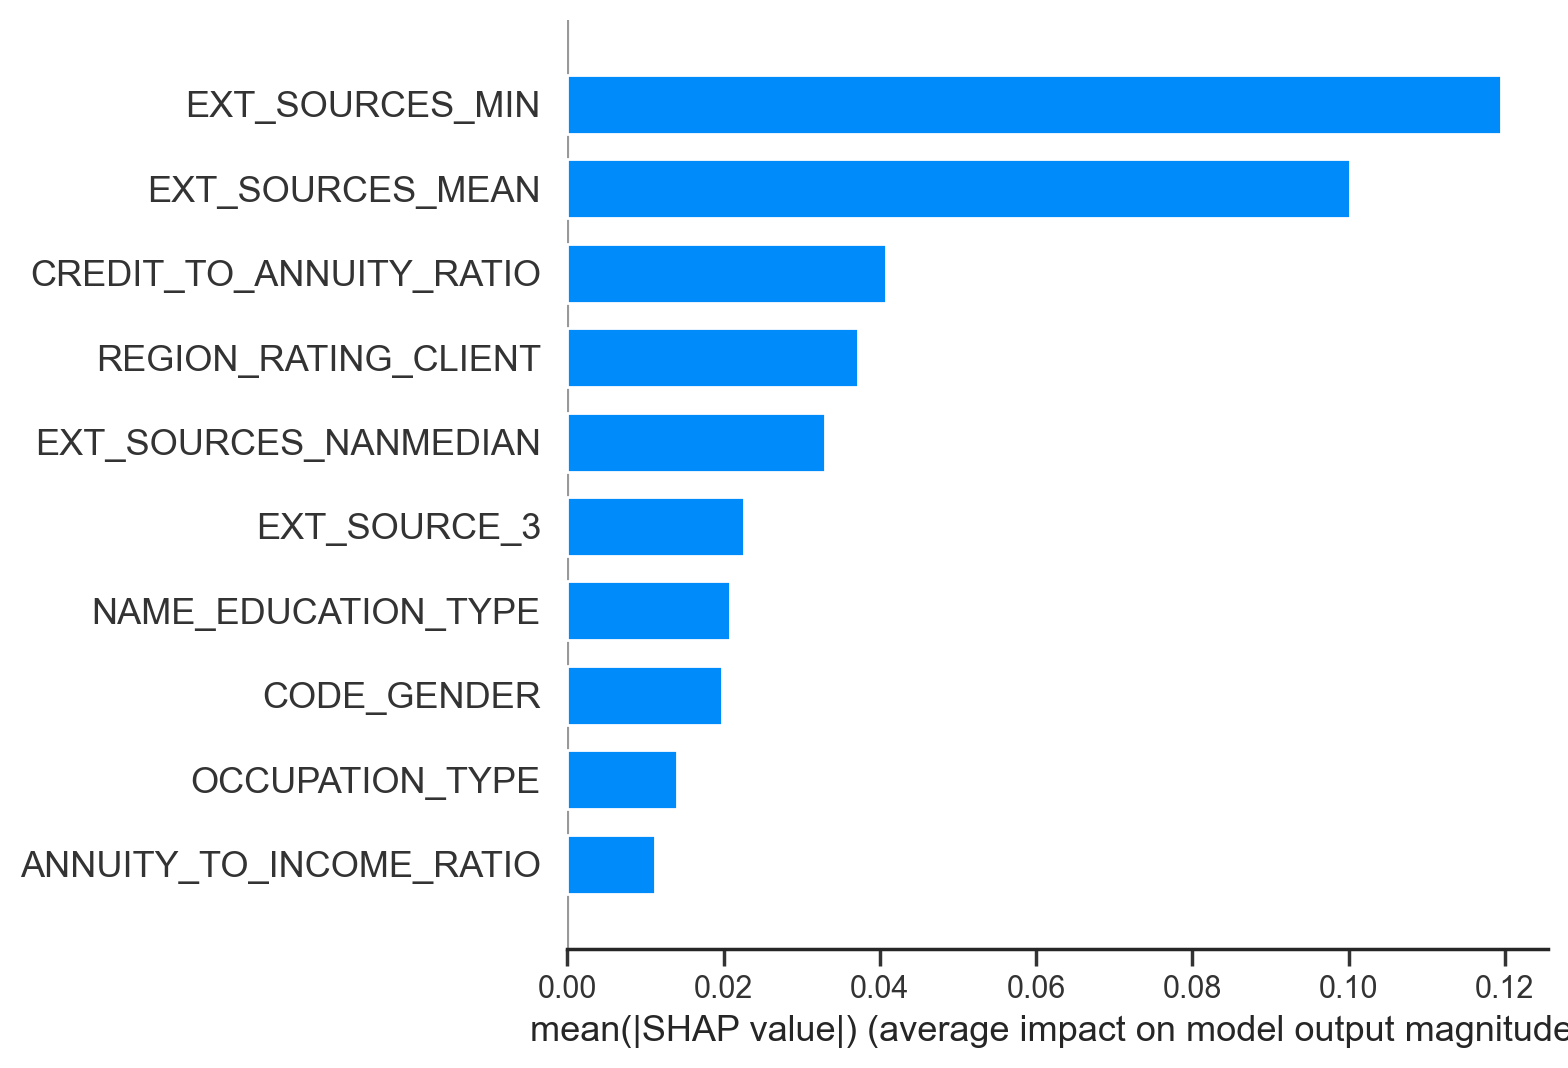

In [57]:
# Method 1:
shap.summary_plot(explanations, max_display=top_ft, plot_type='bar') #feature_names=X_TEST.columns,

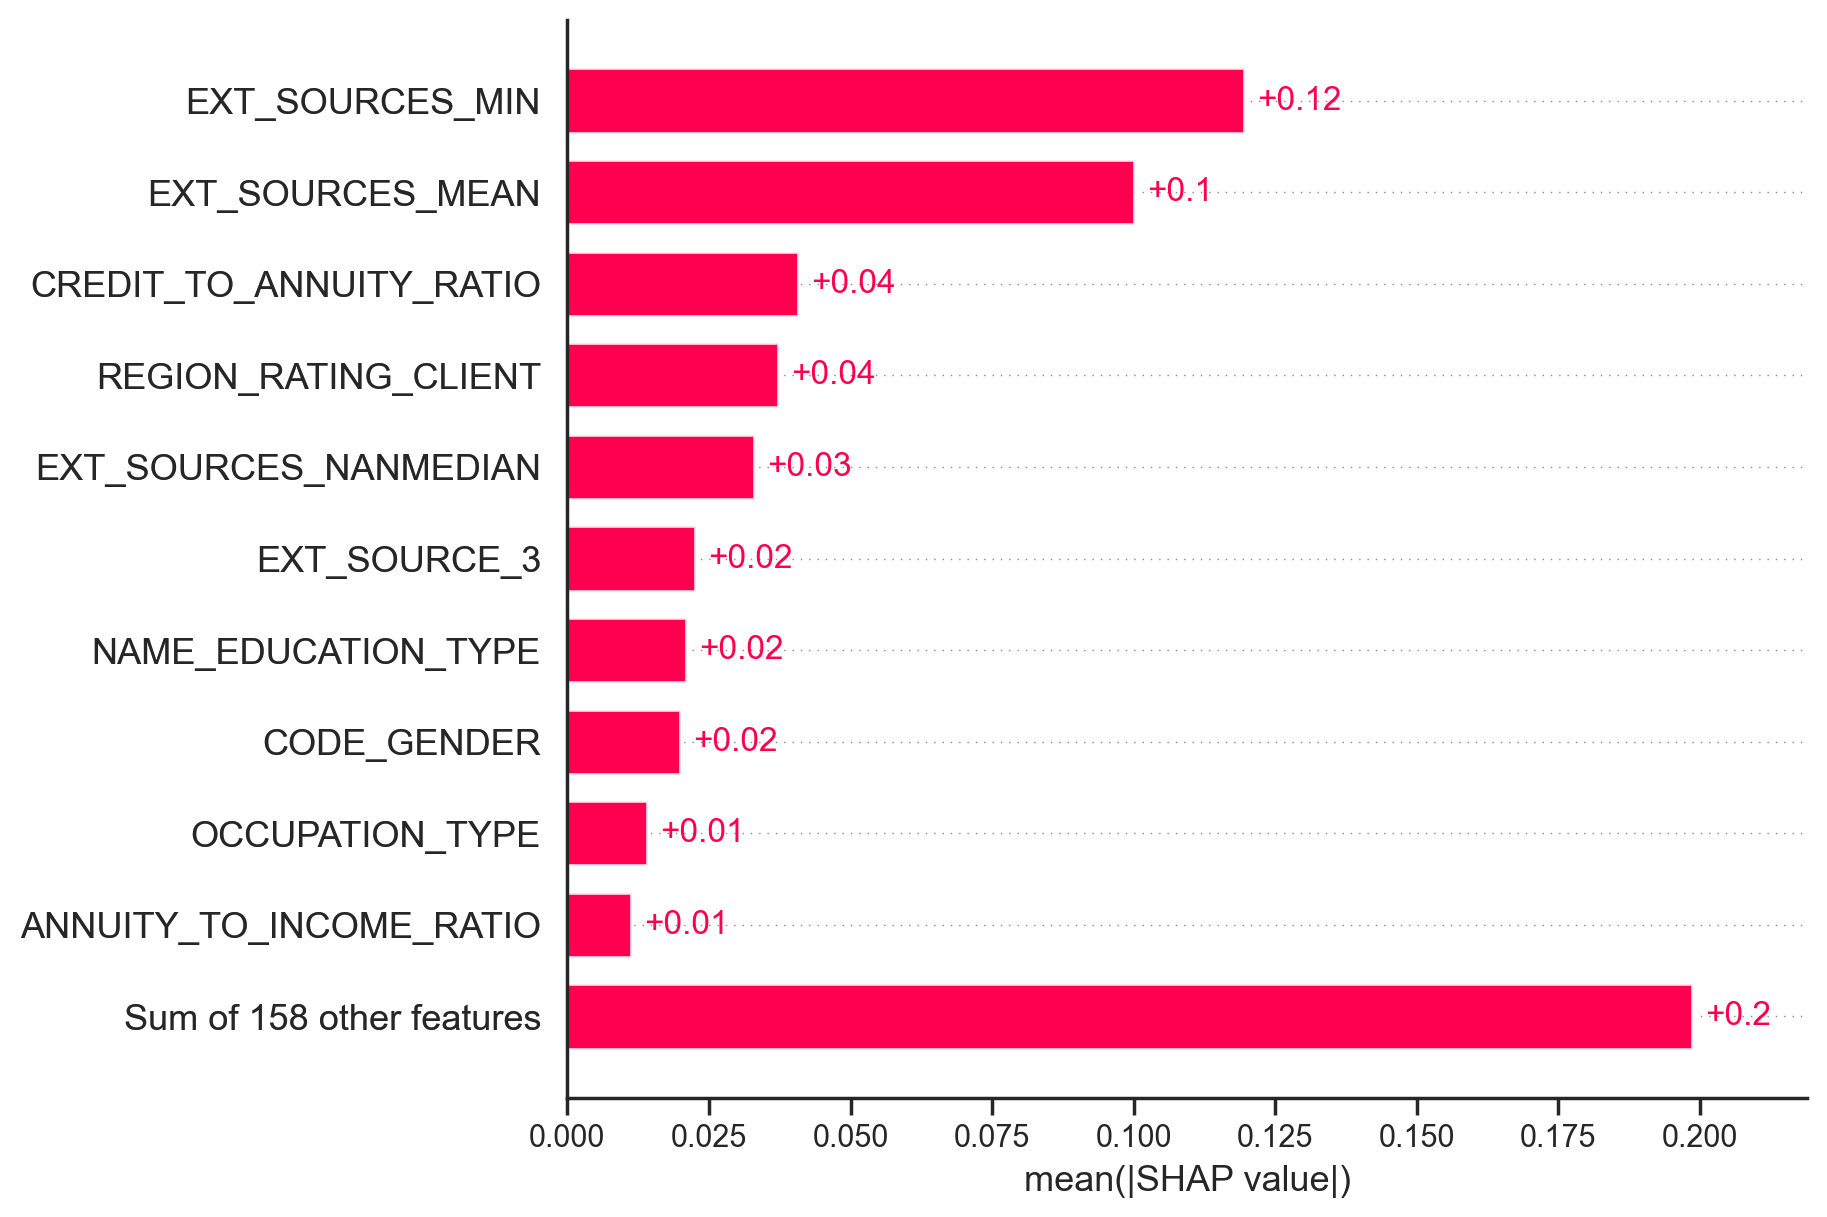

In [58]:
# Method 2 (with the absolute mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations, max_display=top_ft+1)

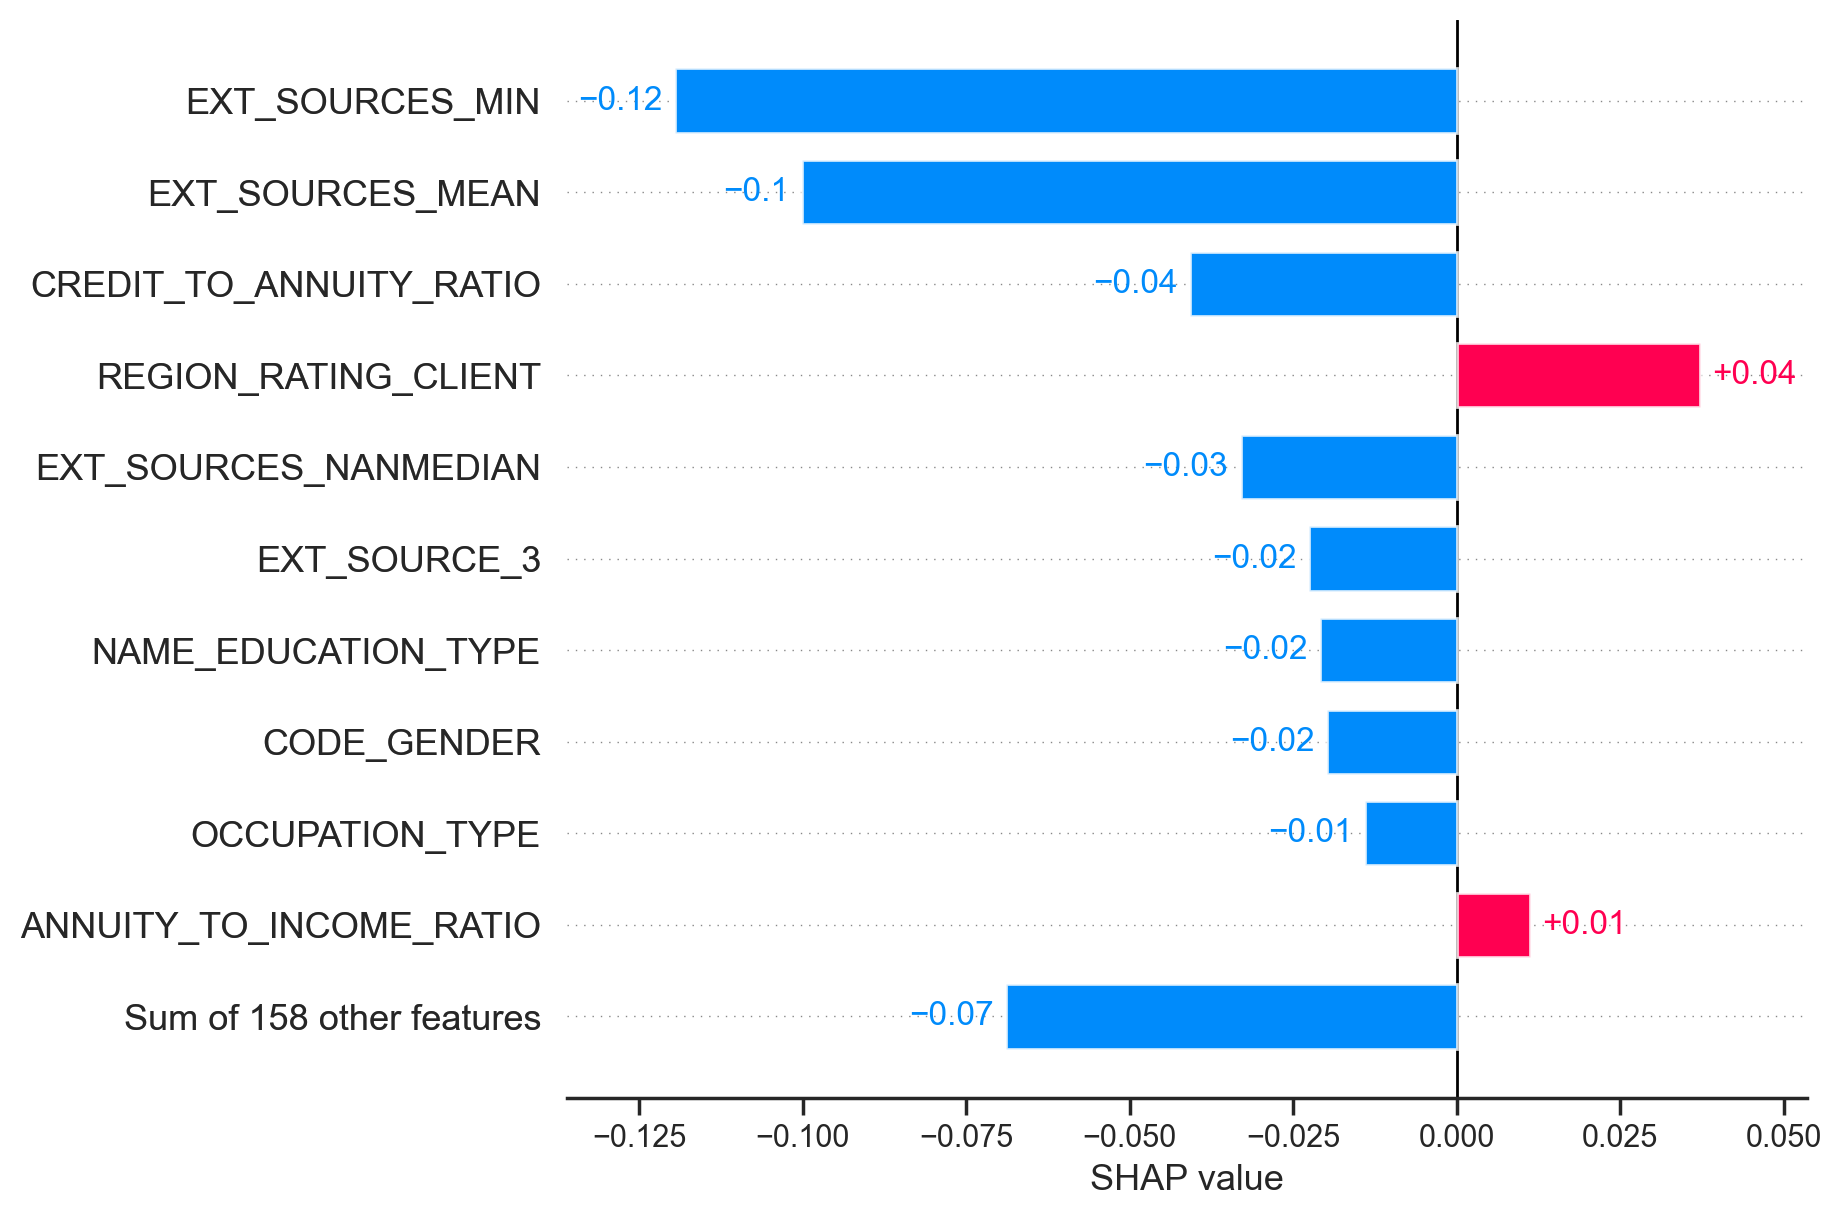

In [61]:
# Method 3 (with the mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations[0], max_display=top_ft+1)

__- Force plots__

In [63]:
### Shape 1: Condensed ###

# NB1: f(x) scale coorresponds to the log odd (=> It shoud be <= 0 for positive ).
#      => In order to get the corresponding probability P = 10^(log odd value).
# NB2: .force_plot() seems to be the same as .plots.force().
#shap.plots.force(explainer_shap.expected_value[1], explanations[1], X_test_norm_sp, feature_names=X_TEST.columns)
shap.plots.force(explanations[0])

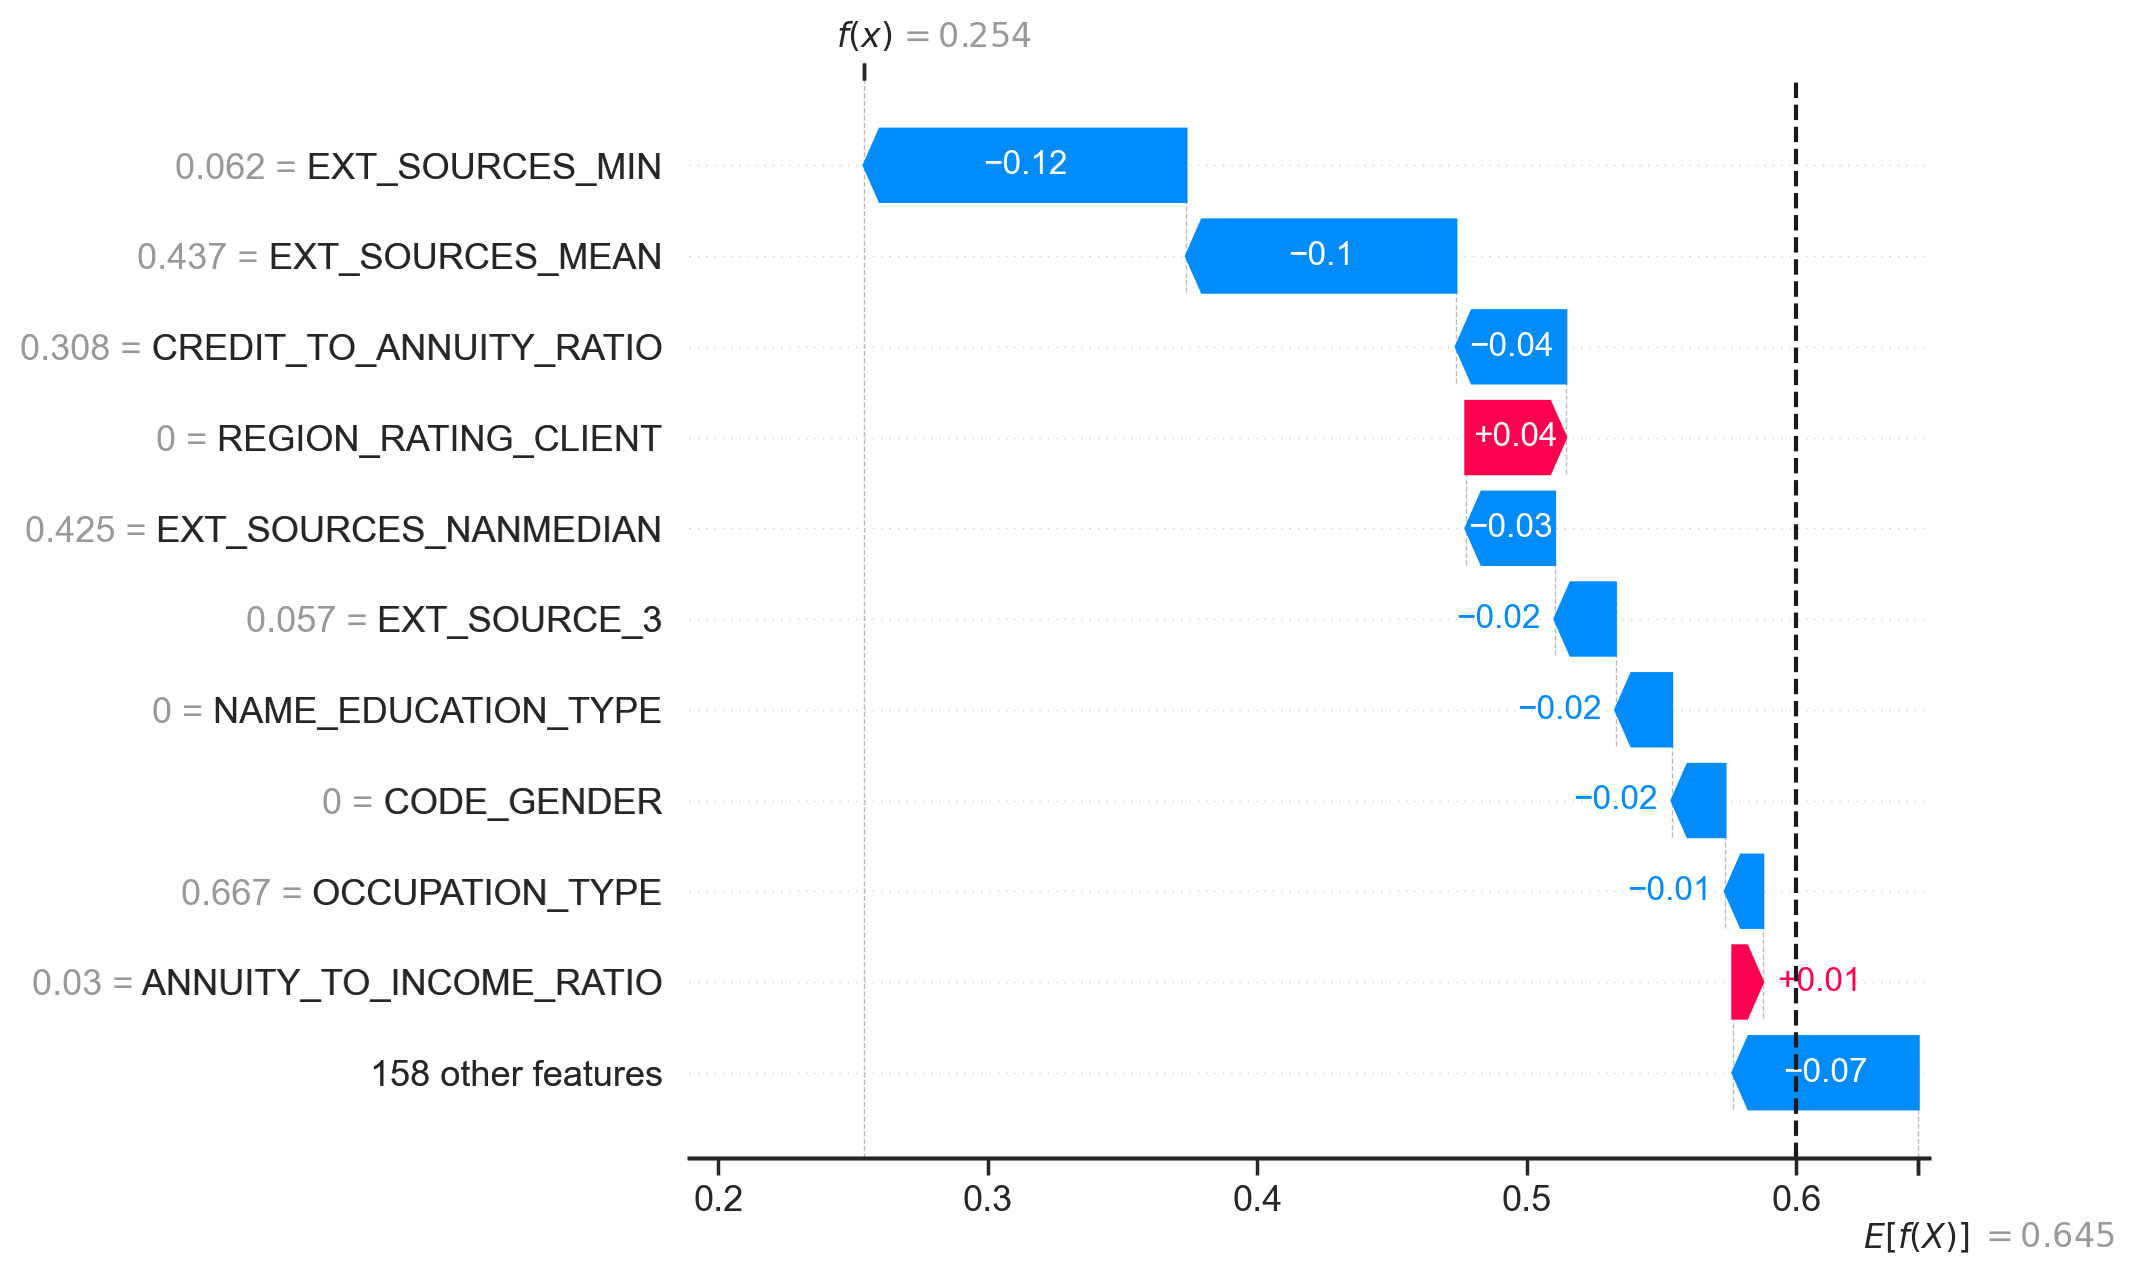

In [64]:
### Shape 2: Detailed ###

# Transform the log odds default model values to their odd counterpart which
# is an easier scale to interpret for none professional people.
# NB: The argument "show=False" allows to not display the graph immediately in order to allows further customization with
#     matplotlib or seaborn or other... before displaying the graph with a "plt.show()".
shap.plots.waterfall(explanations[0], top_ft+1, show=False)  
plt.axvline(x=0.6, color='k', linestyle='--')
#plt.xticks()
plt.show()

In [ ]:

for i, idx in enumerate(range(len(clf.predict_proba(X_test_norm)))):
    #print(clf.predict_proba(X_test_norm)[0])
    if clf.predict_proba(X_test_norm)[i][0] < 0.3:
        print(idx, clf.predict_proba(X_test_norm)[i])

### Dashboard: streamlit

In [ ]:
#from pathlib import Path
#import pandas as pd
import streamlit as st
from streamlit_jupyter import StreamlitPatcher, tqdm

import streamlit.components.v1 as components

StreamlitPatcher().jupyter()  # register streamlit with jupyter-compatible wrappers

In [ ]:
df_test_w_ids

In [ ]:
#####################################
### Dossiers de crédit similaires ###
#####################################

test_features_nn = test_features_with_id
test_features_nn.reset_index(drop=True, inplace=True)

credit_cur = test_features_nn[test_features_nn['SK_ID_CURR'] == str(credit_id_default_test)+'_'].iloc[0:1,1:]

scoring_multi_nn = nn_credit_test.kneighbors(credit_cur, 15, return_distance=False)
best_nn = pd.DataFrame(scoring_multi_nn)

gap_0 = 5

best_nn_ = best_nn.iloc[0:1,gap_0-4:gap_0].T
best_nn_ = best_nn_.set_index([0]).merge(test_features_nn, left_index=True, right_index=True)
scoring_multi_nn = best_nn_.merge(scoring_test, left_on='SK_ID_CURR', right_on='SK_ID_CURR')[['SK_ID_CURR','_P','_Pred','_True']]

##################################################
### Dossiers de crédit similaires - base score ###
##################################################

current_P = scoring_test[scoring_test['SK_ID_CURR'] == str(credit_id_default_test)+'_'][['_P']].iloc[0,0]
gap_1 = current_P * gap_0 / 100
scoring_multi = scoring_test[((scoring_test['_P'] > (current_P - gap_1))
                              & (scoring_test['_P'] < current_P))|((scoring_test['_P'] < (current_P + gap_1))
                                                                    & (scoring_test['_P'] > current_P))].sort_values('_P')

scoring_multi = pd.concat([scoring_multi.head(2),scoring_multi.tail(2)])
del scoring_multi['_N']

#############################################
### Choix du modèle de crédits similaires ###
#############################################

scoring_multi_ = scoring_multi

feat_val_per_cust_multi = scoring_multi_.merge(test_features_with_id, left_on='SK_ID_CURR',
                                              right_on='SK_ID_CURR').sort_values('_P')

feat_val_per_cust_multi.sort_index(inplace=True)
feat_val_per_cust_multi = feat_val_per_cust_multi.T

feat_val_per_cust_cur = test_features_with_id[test_features_with_id['SK_ID_CURR'] == str(credit_id_default_test)+'_']
feat_val_per_cust_cur = scoring_test.merge(feat_val_per_cust_cur, left_on='SK_ID_CURR',
                                              right_on='SK_ID_CURR').sort_values('_P')

feat_val_per_cust_cur = feat_val_per_cust_cur.T

feat_val_per_cust_multi = feat_val_per_cust_cur.merge(feat_val_per_cust_multi, left_index=True, right_index=True, how = 'right')
feat_val_per_cust_multi.reset_index(inplace=True)

tab_labels = ['Variable', 'Courant', 'Réf. 1', 'Réf. 2', 'Réf. 3', 'Réf. 4', 'Importance']
feat_imp.columns = ['index','importance']

# On fusionne les variables importantes avec les variables du dossier de crédit
feat_val_per_cust_2_2 = feat_val_per_cust_multi.merge(feat_imp,
                                                      left_on='index',
                                                      right_on='index',
                                                      how='left')

feat_val_per_cust_2_2 = round(feat_val_per_cust_2_2,2)
feat_val_per_cust_2_2.columns = tab_labels

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = 200,
    delta = {'reference': 160},
    gauge = {
        'axis': {'visible': False}},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    value = 120,
    gauge = {
        'shape': "bullet",
        'axis' : {'visible': False}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 300,
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "delta",
    value = 40,
    domain = {'row': 1, 'column': 1}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number+delta+gauge",
        'delta' : {'reference': 90}}]
                         }})

In [ ]:

    
    #############
    ### Jauge ###
    #############
    
    if input_value_str == best_record_['SK_ID_CURR'].iloc[0]:
        proba_ = pd.DataFrame(yp).iloc[1,0]
        proba_worst_ = pd.DataFrame(yp).iloc[0,0]
    
    elif input_value_str == worst_record_['SK_ID_CURR'].iloc[0]:
        proba_ = pd.DataFrame(yp).iloc[0,0]
        proba_worst_ = pd.DataFrame(yp).iloc[0,0]
        
    else:
        proba_ = pd.DataFrame(yp).iloc[1,0]
        proba_worst_ = pd.DataFrame(yp).iloc[0,0]

    fig_gauge = go.Figure(go.Indicator(
        mode = "gauge+number+delta",
        value = proba_,
#         title = {'text': "Risque d'insolvabilité", 'font': {'size': 11}},
        delta = {'reference': thr_ch, 'increasing': {'color': "Red"}, 'decreasing': {'color': "Green"}},
        gauge = {
            'axis': {'range': [0, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
            'bar': {'color': 'rgba(255, 255, 255, 0.6)'},
            'bgcolor': "white",
            'borderwidth': 2,
            'bordercolor': "gray",
            'steps': [
                {'range': [0, thr_ch], 'color': 'rgba(0, 153, 51, 0.8)'},
                {'range': [thr_ch, 1], 'color': 'rgba(255, 51, 0, 0.8)'}],
            'threshold': {
                'line': {'color': "white", 'width': 1},
                'thickness': 1,
                'value': proba_worst_}}))

    fig_gauge.update_layout(paper_bgcolor = "lightgrey",
                            autosize=True,
                            height=150,
                            margin=dict(l=30, r=30, t=20, b=20),
                            font = {'color': "grey", 'family': "Arial"})

    return fig_scoring, fig_gauge

In [ ]:
fig_scoring = go.Figure()
    
    fig_scoring.add_trace(go.Bar(
        y=credit,
        x=yp,
        name='_P',
        orientation='h',
        text=yp,
        textposition='inside',
        marker=dict(
                color='rgba(255, 51, 0, 0.8)',
                line=dict(color='lightgrey', width=1)
        )
    ))
    
    fig_scoring.add_trace(go.Bar(
        y=credit,
        x=yn,
        name='_N',
        orientation='h',
        text=yn,
        textposition='inside',
        marker=dict(
            color='rgba(0, 153, 51, 0.8)',
            line=dict(color='lightgrey', width=1)
        )
    ))

    fig_scoring.update_layout(
        xaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
            zeroline=False
        ),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
            zeroline=False,
        ),
        barmode='stack',
                      margin=dict(l=20, r=20, t=20, b=20),
                      autosize=True,
                      height=125,
                      plot_bgcolor=colors['background_2'],
                      paper_bgcolor=colors['background_2'],
                     )  

    fig_scoring.update_layout(transition_duration=500)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 450,
    #title = {'text': "Speed"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

In [ ]:
col1, col2, col3 = st.columns(3)

with col1:
   st.header("A cat")
   st.image("https://static.streamlit.io/examples/cat.jpg")

with col2:
   st.header("A dog")
   st.image("https://static.streamlit.io/examples/dog.jpg")

with col3:
   st.header("An owl")
   st.image("https://static.streamlit.io/examples/owl.jpg")

In [ ]:
@st.cache
def load_data():
    df = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))
    return df

def st_shap(shap_plot, height=10):
    shap_html = f"<head>{shap.getjs()}</head><body>{shap_plot.html()}</body>"
    components.html(shap_html, height=height)


def shap_plot_waterfall ():
    shap_values_transformed = logodd_to_odd(explanations, yhat, cat_class)
    fig = shap.plots.waterfall(explanations_transformed[cat_class], top_ft+1, show=False)  
    fig.axvline(x=0.6, color='k', linestyle='--')
    #plt.xticks()
    st.show(fig)
    #plt.show()
    
df = load_data()
    
selected_customer_id = st.selectbox("Customer ID", df['SK_ID_CURR'])#, index=0, format_func=special_internal_function, key=None, help=None, on_change=None, args=None, kwargs=None, *, disabled=False, label_visibility="visible")


col1, col2 = st.columns(2)

with col1:
    st.header("Gauge")
    st.slider("Threshold", 0.0, 1.0, 0.5, 0.01)#, min_value=None, max_value=None, value=None, step=None, format=None, key=None, help=None, on_change=None, args=None, kwargs=None, *, disabled=False, label_visibility="visible")


#name = st.text_input("CouCou")

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#st_shap(shap.plots.bar(explanations_transformed, max_display=top_ft+1))
st.write(shap.plots.force(explanations_transformed, X_test_norm_sp, feature_names=X_TEST.columns))


col1, col2 = st.columns(2)


with col1:
    st.header("Absolute SHAP values")
    st.write(shap.plots.bar(explanations_transformed, max_display=top_ft+1))

with col2:
    st.header("Detailed force plot")
    st.write(shap_plot_waterfall())

    
st.dataframe(df[df['SK_ID_CURR'] == selected_customer_id])

In [ ]:
streamlit run "D:\0Partage\MP-P2PNet\MP-Sync\MP-Sync_Pro\Info\OC_DS\Projet 7\GitRepo\api\streamlit\app.py"

In [ ]:
STOP

In [ ]:

for i, idx in enumerate(range(len(clf.predict_proba(X_test_norm)))):
    #print(clf.predict_proba(X_test_norm)[0])
    if clf.predict_proba(X_test_norm)[i][0] < 0.3:
        print(idx, clf.predict_proba(X_test_norm)[i])

### LIME

LIME (Local Interpretable Model-Agnostic Explanations) is a python library for local interpretations.<br>
LIME doc: https://lime-ml.readthedocs.io/en/latest/lime.html

*NB: show_in_notebook() method does not work.*

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
def create_lime_explainer (model_pl, data, class_labels = list(set(y_TRAIN))):

    ft_labels = data.columns

    # NB: Another way to get all objetc dtypes columns pd.api.types.is_categorical_dtype(data[ft_label])].
    cat_ft_labels = list(ft_labels[data.dtypes.apply(str).isin(['int8', 'int16', 'int32', 'int64'])]) # NB: Get all int columns.
    cat_ft_pos_idx = [i for i, ft_label in enumerate(data.columns) if ft_label in cat_ft_labels]

    scaler = model_pl["scaler"]
    data = scaler.transform(data) # scale data to reflect train time scaling. NB: data are now data values => it might not be the same object as the original data object input.

    lime_explainer = LimeTabularExplainer(data,
                                          feature_names=ft_labels,
                                          class_names=class_labels,
                                          categorical_features=cat_ft_pos_idx,
                                          categorical_names=cat_ft_labels,
                                          mode="classification",
                                          feature_selection='auto',
                                          random_state=0,
                                          verbose=False,
                                         )
    
    return lime_explainer

In [ ]:
def figure_lime_explanation (ft_expl_dict):
    
    l_ft_labels = list(ft_expl_dict.keys())[::-1]
    l_ft_expl = list(ft_expl_dict.values())[::-1]

    plt.barh(l_ft_labels, l_ft_expl,
             #label=(pd.Series(l_ft_expl) > 0).map({True: 'Positive', False: 'Negative'}),
             color=(pd.Series(l_ft_expl) > 0).map({True: 'g', False: 'r'})
            )

In [ ]:
%%time

model_pl_label = 'wt_lgbm_clf_opt'
model_pl = df_MODELS.loc[model_pl_label]['Models']
predict_fn = lambda x: model_pl['model'].predict_proba(x) #>= df_MODELS.loc[model_pl_label]['Best_proba_threshold_train'] #model_pl['model'].predict_proba #df_MODELS.loc[model_pl_label]['yhat_train']
l_ft_labels = list(X_TRAIN.columns)
top_ft = 10 # Select the number of the most important features to keep.
client_idx = 9
n_iter = 10

X_test_norm = model_pl['scaler'].transform(X_TEST)

t0 = time()
# Explain for the selected client from the test data.
delta_t = 0
lime_metrics_opt = {"class_diff": 1}
for i in range(n_iter):
    lime_explainer = create_lime_explainer(model_pl, X_TRAIN, y_TRAIN)
    lime_explanation = lime_explainer.explain_instance(X_test_norm[client_idx], predict_fn, num_features=top_ft)#, num_samples = 10000) 
    if delta_t == 0:
        delta_t += time() - t0

    actual_pred = predict_fn(X_test_norm[client_idx].reshape(1,-1))
    perc_pred_diff = abs(actual_pred[0][1] - lime_explanation.local_pred[0])

    lime_metrics = {"lime class1": lime_explanation.local_pred[0], "actual class1": actual_pred[0][1], "class_diff": round(perc_pred_diff,5)}
    if perc_pred_diff < lime_metrics_opt["class_diff"]:
        lime_metrics_opt = lime_metrics
        lime_explainer_opt = lime_explainer
        lime_explanation_opt = lime_explanation
    
ft_expl_dict = {}
for ft_idx, expl in lime_explanation_opt.as_map()[1]:
    ft_expl_dict[l_ft_labels[ft_idx]] = expl

    
# Show the dictionary.
#print("LIME explanation for the {0} most important features:\n".format(top_ft))
#pprint(ft_expl_dict)

# Graphical representation.
figure_lime_explanation(ft_expl_dict)
plt.title("LIME explanation of the {0} most important features".format(top_ft))
#plt.legend()
plt.show()

pd.DataFrame(lime_metrics_opt, index=[1])

In [ ]:
delta_t

# API Flask

In [ ]:
from flask import Flask
#from .views import app

In [ ]:
app = Flask(__name__)

@app.route('/api/flask/')
def index():
    return "Hello world !"

if __name__ == "__main__":
    app.run()

In [ ]:
@app.route('/api/flask/')
def api_flask ():
    pass # ligne temporaire